In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as ss
import math
import random

# Using Monte Carlo to estimate $\pi$

One method to estimate the value of $\pi = 3.141592…$  is by using a Monte Carlo method. This methods consists of drawing on a canvas a square with an inner circle. We then generate a large number of random points within the square and count how many fall in the enclosed circle.

The same ratio can be used between the number of points within the square and the number of points within the circle.



The Area of a circle = $\pi r^2$

The Area of  a square = $ 4 r^2$

The probability that  apoint is inside a  circle P(inside a circle)= $\frac{\pi r^2}{4r^2}$

The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side $r$ units. Imagine a circle inside the same domain with same diameter and inscribed into the square. We then calculate the ratio of number points that lied inside the circle and total number of generated points. Refer to the image below:


$\frac{\textrm{area of the circle}}{\textrm{area of the square}} = \frac{\textrm{no. of points generated inside the circle}}{\textrm{total no. of points generated or no. of points generated inside the square}}$

that is,

$\pi = 4 \ast \frac{\textrm{no. of points generated inside the circle}}{\textrm{no. of points generated inside the square}} $

We simply generate random $(x, y)$ pairs and then check if  $x^{2} + y^{2} \leqslant r $ . If yes, we increment the number of points that appears inside the circle.

The accuracy of the Monte Carlo estimate for $\pi$ depends on the number of randomly chosen points, or Monte Carlo trials. The more the trials/iterations the closer the estimate to the true value of $\pi$. However, the convergence is rather slow and in practice a very large number of Monte Carlo trials are often used.

In [2]:
iterations = 1000
radius = 2 
no_circle_points,no_square_points = 0,0

all_points = []

# Total Random numbers generated. All possible (x,y) points 
for i in range(iterations):
    all_points.append([np.random.uniform(-radius,radius), np.random.uniform(-radius,radius)])
    
    
#Calculate the distance between (x, y) and the origin of the circle.
#This value is squared to avoid negatives.

origin_dist =[(all_points[i][0]**2+all_points[i][1]**2) for i in range(iterations)]


inside_points,outside_points =[],[]

#For each of the points selected in the iteration, 
#check whether the distance is less than or equal to the radius pf the circle.
#Note that the distance was squared to avoid negatives,, so must be the radius when comparing.
#If less then it is inside, otherwise it is outside


for i in range(iterations):
   # Checking if (x, y) lies inside the circle 
    if((origin_dist[i] <= radius**2)):
        inside_points.append([all_points[i][0],all_points[i][1]])
        no_circle_points +=1
    else:
        outside_points.append([all_points[i][0],all_points[i][1]])
    
    no_square_points +=1
        

# Visualize

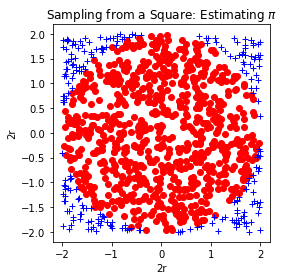

In [3]:
# Change the list to array for easy indexing
inside_points=np.array(inside_points)
outside_points=np.array(outside_points)



ax = plt.subplot(111)

ax.plot(inside_points[:,0],inside_points[:,1], 'ro')
ax.plot(outside_points[:,0],outside_points[:,1], 'b+')
ax.set_xlabel('2r')
ax.set_ylabel('2r')
ax.set_title("Sampling from a Square: Estimating $\pi$")
ax.set_aspect(aspect=1)
plt.savefig('square.png')
plt.show()

# Estimate the $\pi$

We compute the ratio between the 

$\pi = 4 =  \frac{\text{no. of points generated inside the circle}}{\text{no. of points generated inside the square}}$

In [4]:
pi = 4* no_circle_points / no_square_points 
print("Approximation of Pi after  ",iterations, 'iterations:', pi) 
plt.show()

Approximation of Pi after   1000 iterations: 3.072
